# Thomas Fire Air and Land Consequences

Author: Hope Hahn

Github: https://github.com/h-hahn/eds220-hwk-4-task-3

## About 
#### Purpose

The following analysis looks at the burn scars of the Thomas fire with false color imagery as well as the Air Quality Index over time; including the time period of the Thomas fire in December 2017.

#### Highlights of analysis

- Fetch data from US Environmental Protection Agency, Landsat 8 satellite, and California Fire Perimeters
- Prepare Air Quality Index data for plotting
- Prepare Landsat and California Perimeter data for plotting
- Visualize Air Quality data from 2017-2018
- Visualize Thomas Fire perimeter on False Color Imagery map

#### Dataset description

**Air Quality Data**

Air Quality Index data from the US Environmental Protection Agency.

**Landsat Satellite Data**

A simplified collection of bands (red, green, blue, near-infrared and shortwave infrared) from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, collected by the Landsat 8 satellite. 

The data was accessed and pre-processed in the Microsoft Planetary Computer to remove data outside land and coarsen the spatial resolution ([Landsat Collection in MPC](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)). Data should be used for visualization purposes only. 

**California Fire Perimeter Data**

A shapefile of fire perimeters in California during 2017. 
The [complete file can be accessed in the CA state geoportal](https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about).

#### Dataset References

California Fire Perimeters (all). (n.d.). Retrieved November 29, 2023, from gis.data.ca.gov website: https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about

Environmental Protection Agency. (n.d.). AirData website file download page. EPA. https://aqs.epa.gov/aqsweb/airdata/download_files.html#AQI 

Microsoft Planetary Computer. Planetary Computer. (n.d.). https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2 

## Import Libraries

In [1]:
import pandas as pd
import os
import rioxarray as rioxr
import geopandas as gpd
import matplotlib.pyplot as plt

## Import Data

Import data for Air Quality Index from 2017 and 2018, as well as data of fire perimeters in California and satellite band data:

In [2]:
# read in data for 2017 daily AQI by county
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')

# read data for 2018 Daily AQI by county
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# import landsat file
landsat1 = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(landsat1)

# import fire perimiters dataset
cal_fire = gpd.read_file('data/California_Fire_Perimeters_2017')

## Data Exploration

Looking at our data before wrangling and analysis:

In [3]:
# look at head of 2017 daily AQI
aqi_17.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2017-01-01,21,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2017-01-04,22,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2017-01-10,19,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2017-01-13,30,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2017-01-16,16,Good,PM2.5,01-003-0010,1


In [4]:
# look at head of 2018 daily AQI
aqi_18.head()

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2018-01-02,32,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2018-01-05,34,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2018-01-08,15,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2018-01-11,19,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2018-01-14,25,Good,PM2.5,01-003-0010,1


In [5]:
# look at head of landsat data
landsat.head()

<xarray.Dataset>
Dimensions:      (y: 5, x: 5, band: 1)
Coordinates:
  * y            (y) float64 3.952e+06 3.952e+06 3.952e+06 3.952e+06 3.951e+06
  * x            (x) float64 1.213e+05 1.216e+05 1.218e+05 1.221e+05 1.224e+05
  * band         (band) int64 1
    spatial_ref  int64 0
Data variables:
    red          (band, y, x) float64 ...
    green        (band, y, x) float64 ...
    blue         (band, y, x) float64 ...
    nir08        (band, y, x) float64 ...
    swir22       (band, y, x) float64 ...

In [6]:
# look at california perimiter head
cal_fire.head()

,index,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,...,GIS_ACRES,COMMENTS,COMPLEX_NA,COMPLEX_IN,IRWINID,FIRE_NUM,DECADES,SHAPE_Leng,SHAPE_Area,geometry
0,19836,41429,2017,CA,CCO,VNC,BROOK,00042450,2017-05-23,2017-05-24,...,10.043819,per walked track,None,None,None,None,2010,1246.055781,59473.666651,"POLYGON ((-13229812.974 4046876.486, -13229786..."
1,19837,41430,2017,CA,CCO,VNC,PACIFIC,00075307,2017-09-09,2017-09-09,...,1.190109,Final Walked track. Small spot to the north east,None,None,None,None,2010,561.418202,7081.369481,"POLYGON ((-13286872.985 4074523.355, -13286895..."
2,19838,41431,2017,CA,CCO,VNC,GRADE,00054660,2017-07-04,2017-07-05,...,47.194027,None,None,None,None,None,2010,2587.259697,279911.825212,"POLYGON ((-13244637.580 4056332.530, -13244620..."
3,19839,41432,2017,CA,CCO,VNC,PACIFICA,00051791,2017-06-24,2017-06-24,...,1.158548,GPS track,None,None,None,None,2010,501.178102,6859.664843,"POLYGON ((-13229521.754 4046254.111, -13229510..."
4,19840,41433,2017,CA,CCO,VNC,MONTVIEW,00040196,2017-05-15,2017-05-15,...,2.893327,Rough per description. waiting for walked GPS...,None,None,None,None,2010,484.388887,17133.006159,"POLYGON ((-13229663.036 4046858.853, -13229667..."


In [7]:
# check if CRS is the same
cal_fire.crs == landsat.rio.crs

False

## Data Preparation and Tidying

Preparing data for analysis and plotting.

### AQI data preparation

**Combine 2017 and 2018 AQI data and tidy column names:**

In [8]:
# glue dataframes together
aqi = pd.concat([aqi_17, aqi_18])

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')

# check to see that columns were updated
aqi.columns

Index(['state_name', 'county_name', 'state_code', 'county_code', 'date', 'aqi',
       'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')

**Select only data from Santa Barbara County and remove unecessary columns:**

In [9]:
# select data only from Santa Barbara County
aqi_sb = aqi[ aqi['county_name'] == 'Santa Barbara']

# remove state name, county name, state code, and county_code columns
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])

# check to see columns were dropped
aqi_sb.columns

Index(['date', 'aqi', 'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting'],
      dtype='object')

**Convert date column to Datetime object and set date column as index:**

In [10]:
# 1. update date column of aqi_sb to be datetime object
aqi_sb['date'] = pd.to_datetime(aqi_sb['date']) 

# 2. update the index of aqi_sb to be the date column
aqi_sb.set_index('date', inplace = True)

# check updated index
aqi_sb.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2018-12-22', '2018-12-23', '2018-12-24', '2018-12-25',
               '2018-12-26', '2018-12-27', '2018-12-28', '2018-12-29',
               '2018-12-30', '2018-12-31'],
              dtype='datetime64[ns]', name='date', length=730, freq=None)

**Calculate five-day rolling average and add it to Santa Barbara AQI data:**

In [11]:
# calculate 5 day rolling average
aqi_sb.aqi.rolling('5D').mean()

# add five_day_average to aqi_sb dataframe
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# checking new column was added
aqi_sb.columns

Index(['aqi', 'category', 'defining_parameter', 'defining_site',
       'number_of_sites_reporting', 'five_day_average'],
      dtype='object')

### Landsat & California Fire Perimeter data preparation:

**Drop the band from the landsat data to make it 2D:**

In [12]:
# drop band from landsat data
landsat = landsat.squeeze().drop('band')

# make sure that band was dropped
landsat.dims

Frozen({'y': 731, 'x': 870})

**Convert the California Fire Perimeter dataset to have the same CRS as the landsat data:**

In [13]:
# set california fire perimeter crs to landsat crs
cal_fire = cal_fire.to_crs(landsat.rio.crs)

# check to see crs is same
cal_fire.crs == landsat.rio.crs

True

**Subset Thomas Fire perimeter**

In [14]:
# select for thomas fire perimeter
thomas_fire = cal_fire[cal_fire['FIRE_NAME'] == 'THOMAS']

## Plotting

**Plot the daily AQI and five-day rolling average in 2017 and 2018 in Santa Barbara County:**

<AxesSubplot:title={'center':'AQI and AQI 5 day average over time'}, xlabel='Date'>

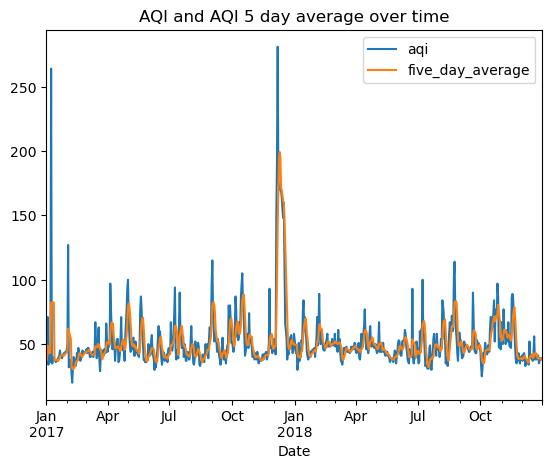

In [15]:
# plot daily AQI and 5-day average in 2017 and 2018 
aqi_sb.plot(y = ['aqi', 'five_day_average'],
            xlabel = 'Date',
            title = 'AQI and AQI 5 day average over time')

**Create false color image with SWIR, NIR, and red; convert to numpy array; then plot:**

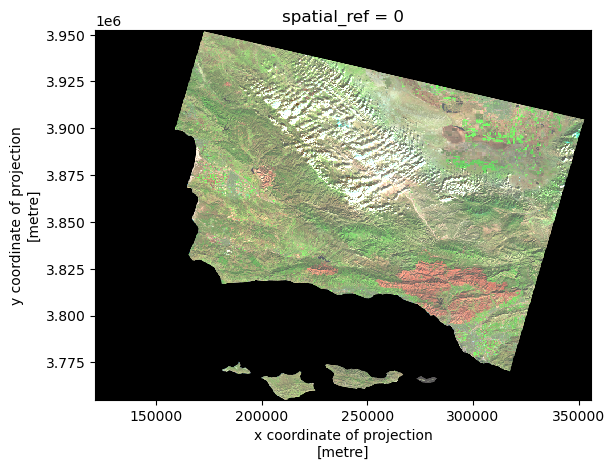

In [16]:
# create false color image with swir22, nir, red
# convert to numpy array
# then plot
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

**Plot previous plot with Thomas Fire Perimeter Border**

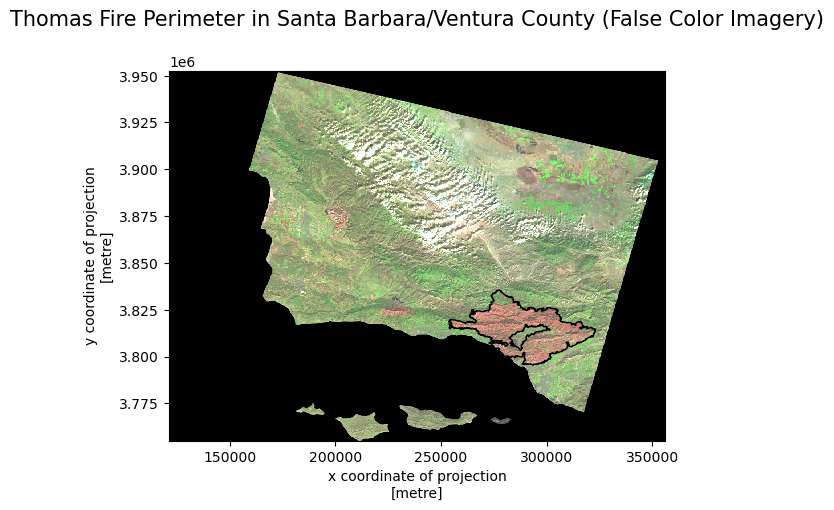

In [17]:
# create axis
fig, ax = plt.subplots()

# -----------------------------------------------------

# plot thomas fire perimeter
thomas_fire.plot(ax = ax,
                facecolor="none",
                edgecolor = 'black')

#------------------------------------------------------

# plot the false color image
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

# -----------------------------------------------------

# set the title 
ax.set_title('Thomas Fire Perimeter in Santa Barbara/Ventura County (False Color Imagery)', 
             fontsize = 15,
             x=0.5, y=1.1) # move title up


# show plot
plt.show()

# Final Output

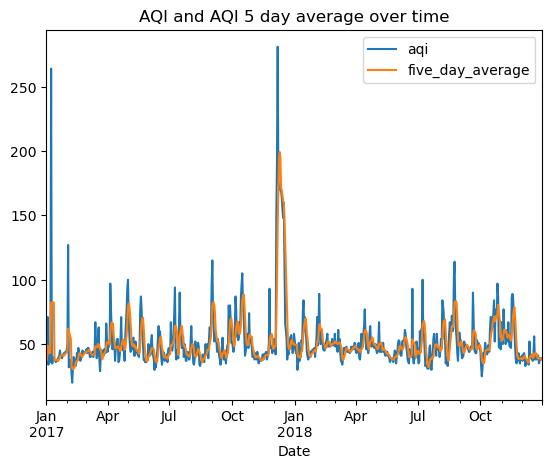

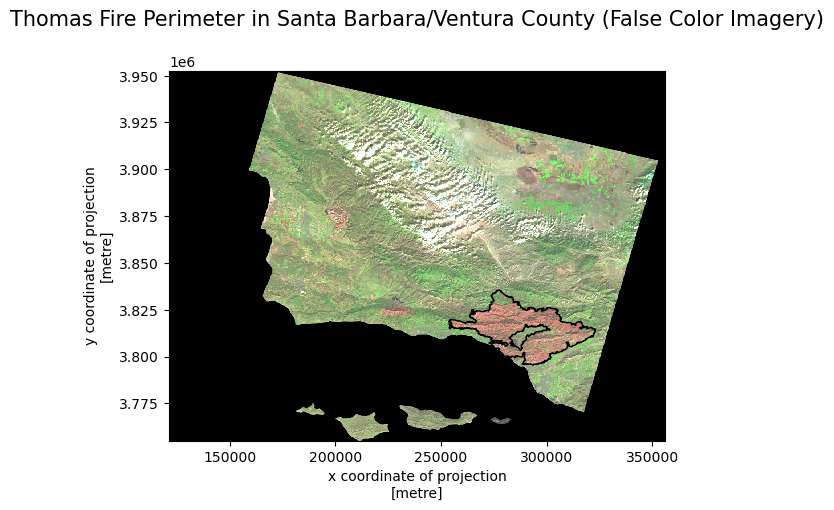

In [18]:
# import libraries and functions
import geopandas as gpd
import os
import rioxarray as rioxr
import matplotlib.pyplot as plt
import pandas as pd

# ---------------------------------------------------------

# import data

# read in data for 2017 daily AQI by county
aqi_17 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip')

# read data for 2018 Daily AQI by county
aqi_18 = pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')

# import landsat file
landsat1 = os.path.join(os.getcwd(),'data','landsat8-2018-01-26-sb-simplified.nc')
landsat = rioxr.open_rasterio(landsat1)

# import fire perimiters dataset
cal_fire = gpd.read_file('data/California_Fire_Perimeters_2017')

# ---------------------------------------------------------

# preparing aqi data

# glue dataframes together
aqi = pd.concat([aqi_17, aqi_18])

# re-assign the column names - .str.lower() makes them lower case
aqi.columns = aqi.columns.str.lower()

#  re-assign the column names again - .str.replace(' ','_') replaces the space for _
aqi.columns = aqi.columns.str.replace(' ','_')

# select data only from Santa Barbara County
aqi_sb = aqi[ aqi['county_name'] == 'Santa Barbara']

# remove state name, county name, state code, and county_code columns
aqi_sb = aqi_sb.drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])

# 1. update date column of aqi_sb to be datetime object
aqi_sb['date'] = pd.to_datetime(aqi_sb['date']) 

# 2. update the index of aqi_sb to be the date column
aqi_sb.set_index('date', inplace = True)

# 5 day rolling window calculation
aqi_sb.aqi.rolling('5D').mean()

# add five_day_average to aqi_sb dataframe
aqi_sb['five_day_average'] = aqi_sb.aqi.rolling('5D').mean()

# ---------------------------------------------------------

# prepare landsat and fire data

# drop band from landsat data
landsat = landsat.squeeze().drop('band')

# set california fire perimeter crs to landsat crs
cal_fire = cal_fire.to_crs(landsat.rio.crs)

# select for thomas fire perimeter
thomas_fire = cal_fire[cal_fire['FIRE_NAME'] == 'THOMAS']

# ---------------------------------------------------------

# plot daily AQI and 5-day average
aqi_sb.plot(y = ['aqi', 'five_day_average'],
            xlabel = 'Date',
            title = 'AQI and AQI 5 day average over time')

# ---------------------------------------------------------

# create thomas fire perimeter plot

# create axis
fig, ax = plt.subplots()

# ------------------------------

# plot thomas fire perimeter
thomas_fire.plot(ax = ax,
                 facecolor="none",
                 edgecolor = 'black')

#--------------------------------

# plot the false color image
landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(robust = True)

# -------------------------------

# set the title 
ax.set_title('Thomas Fire Perimeter in Santa Barbara/Ventura County (False Color Imagery)', 
             fontsize = 15,
             x=0.5, y=1.1) # move title up

# show plot
plt.show()